

<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="20%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-480 Redes Complejas</h1>

<H2 align='center'> Tarea 3 </H2>
<H3 align='center'> Kevin Lagos Lavín - Andrés Navarro Galleguillos</H3>
<H3 align='center'> 201673012-5 - 201673001-K </H3>
<hr style="height:2px;border:none"/>

In [1]:
import networkx as nx
from networkx.algorithms.community import label_propagation_communities
import networkx.algorithms.community as nx_comm
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import random
import matplotlib.cm as cm
from collections import Counter
import scipy.optimize as opt
import scipy.integrate as integrate

In [2]:
!pip install python-modularity-maximization==0.0.1rc4

In [3]:
from modularity_maximization import partition
from modularity_maximization.utils import get_modularity

# Pregunta 1

In [ ]:
# Seeds para probar
random.seed(2021)
np.random.seed(2021)

def genGrafos():
  #Grafo ER con p=0.2
  primerG = nx.gnp_random_graph(200, 0.2)
  #for initEdge in initGraph.edges:
  #  print(initEdge)

  particion1 = [] #0 a 99, 100 a 199
  particion2 = [] #0 a 49 + 100 a 149, 50 a 99 + 150 a 199
  probs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

  nuevoG = nx.DiGraph()
  nuevoG.add_nodes_from(range(0,200))

  for i in range(len(probs)):
    #Para primera partición
    part1G = nuevoG.copy() #deepcopy del grafo
    for arista in primerG.edges(): #En las aristas el de la izquierda siempre es el menor
      if arista[0] < 100 and arista[1] >=100:
        # dirección igual a 0, arco desde arista[0] a arista[1]
        # dirección igual a 1, arco desde arista[1] a arista [0]
        direccion = random.choices([0,1], [probs[i], 1-probs[i]])[0]
      else:
        # si es del mismo grupo es random
        direccion = random.choices([0, 1], [0.5, 0.5])[0]
      if direccion == 0:
        part1G.add_edge(arista[0], arista[1])
      else: 
        part1G.add_edge(arista[1], arista[0])
    particion1.append(part1G)
    #Para segunda partición
    part2G = nuevoG.copy()
    for arista in primerG.edges(): #En las aristas el de la izquierda siempre es el menor
      direccion = random.choices([0, 1], [0.5, 0.5])[0]
      if direccion == 0:
        part2G.add_edge(arista[0], arista[1])
      else: 
        part2G.add_edge(arista[1], arista[0])  
    particion2.append(part2G)

  return particion1, particion2

In [ ]:
def getModularidades(particion1, particion2):    
  modularidad1 = []
  modularidad2 = []

  for i in range(len(particion1)):
    comm_dict = partition(particion1[i], refine=False)
    modularidad = get_modularity(particion1[i], comm_dict)
    modularidad1.append(modularidad)
    comm_dict = partition(particion2[i], refine=False)
    modularidad = get_modularity(particion2[i], comm_dict)
    modularidad2.append(modularidad)
  return modularidad1, modularidad2


In [ ]:
totalMod1 = []
totalMod2 = []

for i in range(50):
  particion1, particion2 = genGrafos()
  modularidad1, modularidad2 = getModularidades(particion1, particion2)
  totalMod1.append(modularidad1)
  totalMod2.append(modularidad2)

Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directe

In [ ]:
#Promediar los valores obtenidos según la probabilidad
totalModProm1 = np.mean(np.array(totalMod1), axis = 0)
totalModProm2 = np.mean(np.array(totalMod2), axis = 0)

print("Valores para primera partición: ")
print(totalModProm1)
print("Valores para segunda partición: ")
print(totalModProm2)

Valores para primera partición: 
[0.11841645 0.09820041 0.09687735 0.0972288  0.09694375 0.09661747
 0.09707845 0.09703673 0.09747557 0.09833102 0.11823035]
Valores para segunda partición: 
[0.09786458 0.09739858 0.09679612 0.09742056 0.09716863 0.09733048
 0.09707516 0.09619531 0.09716253 0.09742309 0.09711811]


Text(0.5, 1.0, 'Probabilidad v/s $Q^d$')

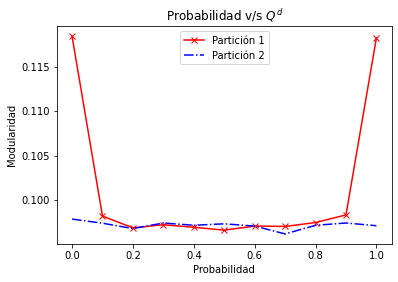

In [ ]:
probs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.plot(probs, totalModProm1, 'rx-',label = 'Partición 1')
plt.plot(probs, totalModProm2, 'b-.',label = 'Partición 2')
plt.legend()
plt.xlabel("Probabilidad")
plt.ylabel("Modularidad")
plt.title("Probabilidad v/s $Q^d$")

#Pregunta 2

In [ ]:
pescado = nx.read_pajek("pescado.net")
print(nx.info(pescado))

Name: 
Type: MultiDiGraph
Number of nodes: 151
Number of edges: 2744
Average in degree:  18.1722
Average out degree:  18.1722


## (a)

In [ ]:
#Calculo de rho_1
def rho1(adMatrix, grafo):
  rho1 = 0
  n , m = adMatrix.shape
  for i in range(n):
    for j in range(n):
      if (i != j):
        if adMatrix[i,j] > 0 and adMatrix[j, i] > 0:
          rho1 +=1
  rho1 = rho1 * 1/(grafo.number_of_edges())

  return rho1

#Calculo de proporcion de aristas existentes respecto a las posibles
def aRaya(grafo):
  n = grafo.number_of_nodes()
  m = grafo.number_of_edges()
  return m/(n*(n-1))

#Calculo de reciprocidad corregida
def rho(r, a):
  return (r - a)/(1 - a)

In [ ]:
# Matriz de adjacencia con pesos
adMatrix = nx.to_numpy_matrix(pescado)
print("Reciprocidad corregida:")
print(rho(rho1(adMatrix, pescado), aRaya(pescado)))


Reciprocidad corregida:
0.3937559737764578


## (b)

In [ ]:
#Calculo de peso promedio basado en el calculo de a_raya
def wRaya(adMatrix):
  suma = 0
  n , m = adMatrix.shape
  for i in range(n):
    for j in range(n):
      if(i != j):
        suma += adMatrix[i,j] 
  suma = suma / (n*(n-1))
  return suma

#Calculo de rho con pesos
def rhoPesos(adMatrix):
  n, m = adMatrix.shape
  wProm = wRaya(adMatrix)
  numerador = 0
  denominador = 0
  for i in range(n):
    for j in range(n):
      if(i != j):
        numerador += (adMatrix[i, j] * wProm) * (adMatrix[j, i] * wProm)
        denominador += (adMatrix[i, j] - wProm) ** 2
  return numerador/denominador


In [ ]:
print("Reciprocidad rho modificado:")
print(rhoPesos(adMatrix))

Reciprocidad rho modificado:
0.9200132648997168


## (c)

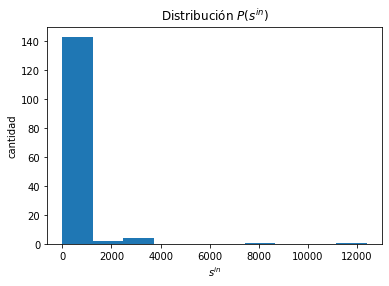

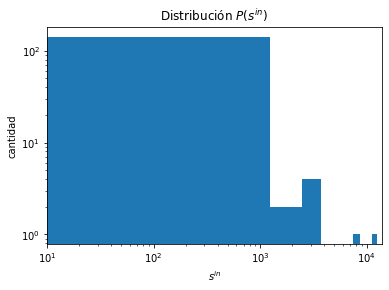

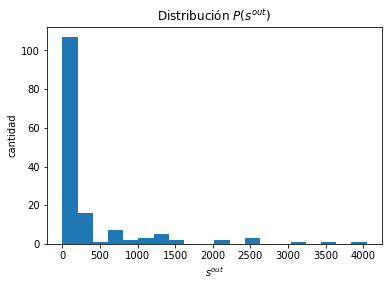

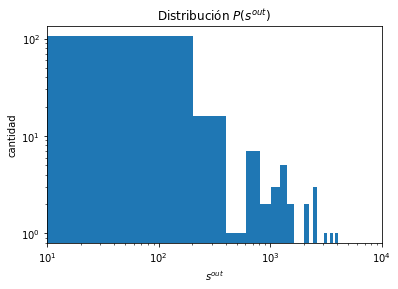

In [ ]:
n, _ = adMatrix.shape

sIn = []
sOut = []

#Calculo de suma de pesos que salen desde los nodos
for i in range(n):
  pesoOut = 0
  for j in range(n):
    pesoOut += adMatrix[i, j]
  sOut.append(pesoOut)

#Calculo de suma de pesos que entran a los nodos
for j in range(n):
  pesoIn = 0
  for i in range(n):
    pesoIn += adMatrix[i, j]
  sIn.append(pesoIn)


plt.hist(sIn)
plt.xlabel("$s^{in}$")
plt.ylabel("cantidad")
plt.title("Distribución $P(s^{in})$")
plt.show()

plt.hist(sIn)
plt.loglog()
plt.xlabel("$s^{in}$")
plt.xticks([10,100,1000, 10000])
plt.ylabel("cantidad")
plt.title("Distribución $P(s^{in})$")
plt.show()

plt.hist(sOut, bins = 20)
plt.xlabel("$s^{out}$")
plt.ylabel("cantidad")
plt.title("Distribución $P(s^{out})$")
plt.show()

plt.hist(sOut, bins = 20)
plt.loglog()
plt.xticks([10,100,1000, 10000])

plt.xlabel("$s^{out}$")
plt.ylabel("cantidad")
plt.title("Distribución $P(s^{out})$")
plt.show()


In [ ]:
#Estimación del exponente con máxima verosimilitud
def paramMaxVer(xMin, data, dataStr):
  #xMin corresponde al minimo valor a descartar de la data
  filterxMin =  [ x for x in data if x > xMin]
  suma = 0
  for i in range(len(filterxMin)):
    suma+= np.log(filterxMin[i]/min(filterxMin))
  alpha = 1 + len(filterxMin) * (suma**-1)
  C = (alpha-1) * (min(filterxMin)**(alpha-1))
  print("Valor de x_min para " + dataStr + ": " + str(min(filterxMin)))
  print("Valor de alpha para " + dataStr + ": " + str(alpha))
  print("Valor de C para " + dataStr + ": " + str(C))

In [ ]:
paramMaxVer(100, sIn, "s in")
paramMaxVer(100, sOut, "s out")

Valor de x_min para s in: 101.42900000000002
Valor de alpha para s in: 1.5423914868100392
Valor de C para s in: 6.644130167900509
Valor de x_min para s out: 100.69700000000002
Valor de alpha para s out: 1.664693659577946
Valor de C para s out: 14.256533044022511


## (d)

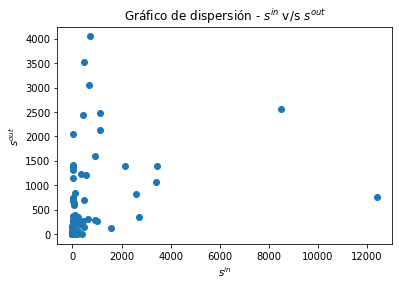

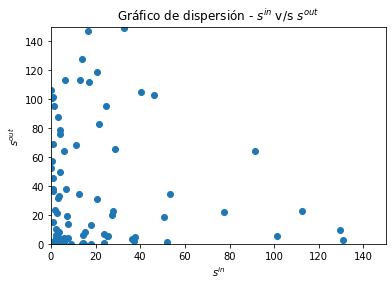

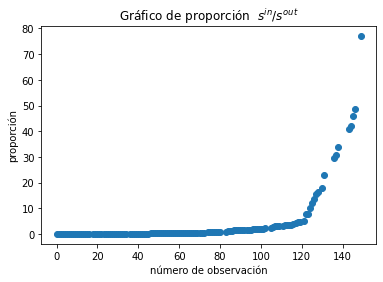

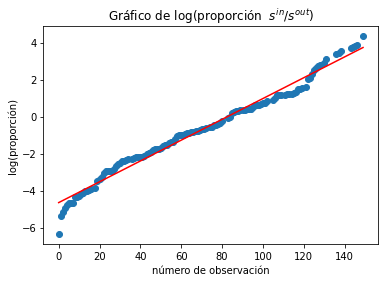

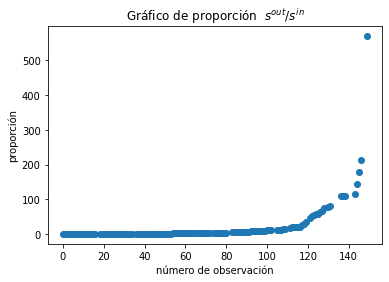

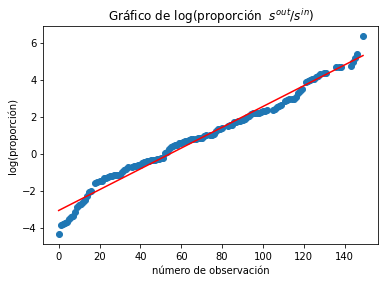

In [ ]:
plt.scatter(sIn, sOut)
plt.xlabel("$s^{in}$")
plt.ylabel("$s^{out}$")
plt.title("Gráfico de dispersión - $s^{in}$ v/s $s^{out}$")
plt.show()

plt.scatter(sIn, sOut)
plt.xlabel("$s^{in}$")
plt.ylabel("$s^{out}$")
plt.xlim([0,150])
plt.ylim([0,150])
plt.title("Gráfico de dispersión - $s^{in}$ v/s $s^{out}$")
plt.show()

#Calculo de proporciones entre valores de Sin y Sout
proporcionSinSout = []
proporcionSoutSin = []
xAxis = []
for i in range(len(sIn)):
  if sIn[i] > 0 and sOut[i] > 0:
    proporcionSinSout.append(sIn[i]/sOut[i])
    proporcionSoutSin.append(sOut[i]/sIn[i])
    xAxis.append(i)
proporcionSinSout.sort()
proporcionSoutSin.sort()

#Regresión lineal para obtener ecuación de la recta
logPsInsOut = [np.log(x) for x in proporcionSinSout]
m1, b1 = np.polyfit(xAxis, logPsInsOut, 1)
logPsOutsIn = [np.log(x) for x in proporcionSoutSin]
m2, b2 = np.polyfit(xAxis, logPsOutsIn, 1)

plt.scatter(xAxis, proporcionSinSout)
plt.xlabel("número de observación")
plt.ylabel("proporción")
plt.title("Gráfico de proporción  $s^{in}$/$s^{out}$")
plt.show()


plt.scatter(xAxis, logPsInsOut)
plt.plot(xAxis, m1*np.array(xAxis) + b1, color="red")
plt.xlabel("número de observación")
plt.ylabel("log(proporción)")
plt.title("Gráfico de log(proporción  $s^{in}$/$s^{out}$)")
plt.show()

plt.scatter(xAxis, proporcionSoutSin)
plt.xlabel("número de observación")
plt.ylabel("proporción")
plt.title("Gráfico de proporción  $s^{out}$/$s^{in}$")
plt.show()


plt.scatter(xAxis, logPsOutsIn)
plt.plot(xAxis, m2*np.array(xAxis) + b2, color = "red")
plt.xlabel("número de observación")
plt.ylabel("log(proporción)")
plt.title("Gráfico de log(proporción  $s^{out}$/$s^{in}$)")
plt.show()



## (e)

In [ ]:
#Creacion de la nueva red
nuevoPescado = nx.Graph()
n, _ = adMatrix.shape
nuevoPescado.add_nodes_from(range(0,n))

for i in range(n):
  for j in range(i, n):
    peso = adMatrix[i, j] + adMatrix[j , i]
    if peso > 0:
      nuevoPescado.add_edge(i, j, weight = peso)
print(nx.info(nuevoPescado))

Name: 
Type: Graph
Number of nodes: 151
Number of edges: 2103
Average degree:  27.8543


In [ ]:
#Calculo de grados para cada nodo
Pgrado =[grado for (nodo, grado) in nuevoPescado.degree()]
#Calculos de peso y fuerza para cada nodo
Pfuerza = []
Ppeso = []
adMatrixNueva = nx.to_numpy_matrix(nuevoPescado)
for i in range(n):
  fuerza = 0
  for j in range(n):
    fuerza += adMatrixNueva[i, j]
    if(adMatrixNueva[i, j] > 0):
      Ppeso.append(adMatrixNueva[i, j] )
  Pfuerza.append(fuerza)

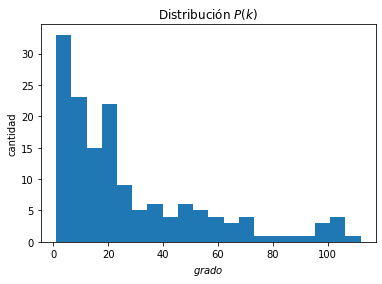

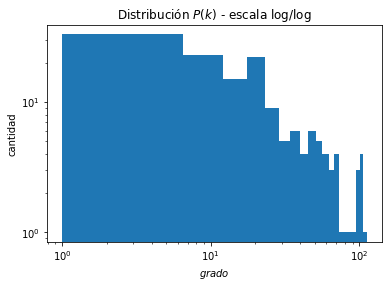

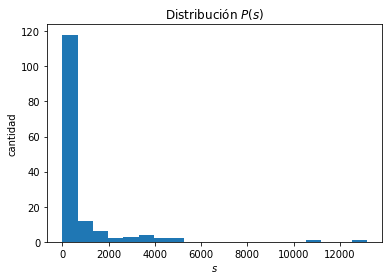

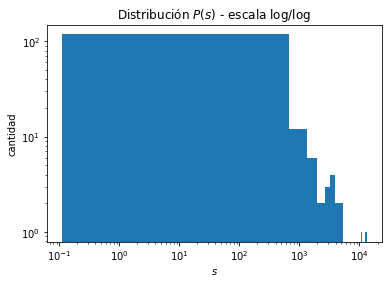

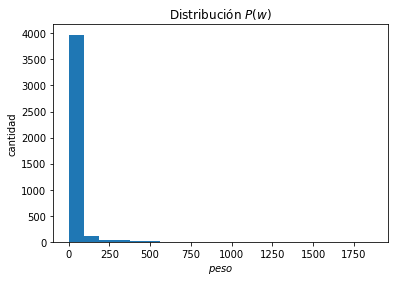

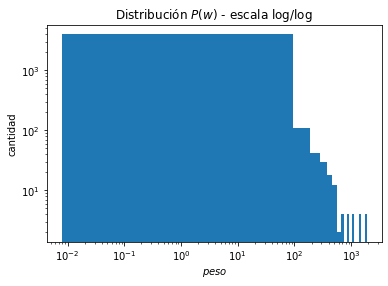

In [ ]:
plt.hist(Pgrado, bins = 20)
plt.xlabel("$grado$")
plt.ylabel("cantidad")
plt.title("Distribución $P(k)$")
plt.show()

plt.hist(Pgrado, bins = 20)
plt.loglog()
plt.xlabel("$grado$")
plt.ylabel("cantidad")
plt.title("Distribución $P(k)$ - escala log/log")
plt.show()

plt.hist(Pfuerza, bins = 20)
plt.xlabel("$s$")
plt.ylabel("cantidad")
plt.title("Distribución $P(s)$")
plt.show()

plt.hist(Pfuerza, bins = 20)
plt.loglog()
plt.xlabel("$s$")
plt.ylabel("cantidad")
plt.title("Distribución $P(s)$ - escala log/log")
plt.show()

plt.hist(Ppeso, bins = 20)
plt.xlabel("$peso$")
plt.ylabel("cantidad")
plt.title("Distribución $P(w)$")
plt.show()

plt.hist(Ppeso, bins = 20)
plt.loglog()
plt.xlabel("$peso$")
plt.ylabel("cantidad")
plt.title("Distribución $P(w)$ - escala log/log")
plt.show()

In [ ]:
paramMaxVer(0, Pgrado, "P(k)")
paramMaxVer(10, Pfuerza, "P(s)")
paramMaxVer(10, Ppeso, "P(w)")

Valor de x_min para P(k): 1
Valor de alpha para P(k): 1.3616839030056078
Valor de C para P(k): 0.3616839030056078
Valor de x_min para P(s): 11.374
Valor de alpha para P(s): 1.350569089999433
Valor de C para P(s): 0.822136934508802
Valor de x_min para P(w): 10.028
Valor de alpha para P(w): 1.7259946451971542
Valor de C para P(w): 3.870879538257644


##(f)

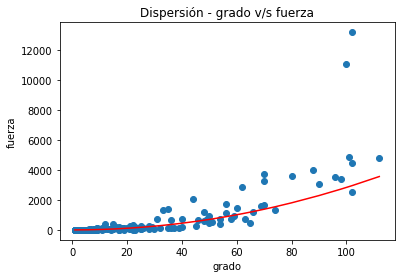

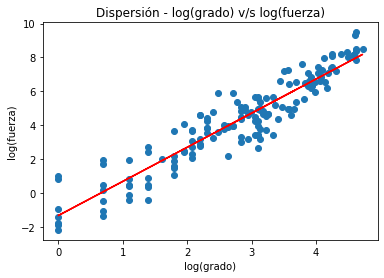

Parámtros para la regresión lineal:
Pendiente: 2.0177505134426172
Intercepto: -1.3443964724316255


In [ ]:
# Pendiente e intercepto para grafico log/log
m3, b3 = np.polyfit([np.log(x) for x in Pgrado], [np.log(x) for x in Pfuerza], 1)


PgradoSort = Pgrado.copy()
PgradoSort.sort()
plt.scatter(Pgrado, Pfuerza)
plt.plot(PgradoSort, np.exp(b3+ m3 * np.array([np.log(x) for x in PgradoSort])), color="red")
plt.xlabel("grado")
plt.ylabel("fuerza")
plt.title("Dispersión - grado v/s fuerza")
plt.show()

plt.scatter([np.log(x) for x in Pgrado], [np.log(x) for x in Pfuerza])
plt.plot([np.log(x) for x in Pgrado], m3*np.array([np.log(x) for x in Pgrado]) + b3, color="red")
plt.xlabel("log(grado)")
plt.ylabel("log(fuerza)")
plt.title("Dispersión - log(grado) v/s log(fuerza)")
plt.show()
print("Parámtros para la regresión lineal:")
print("Pendiente: "+ str(m3))
print("Intercepto: " + str(b3))

## (g)

In [ ]:
print("Average clustering con pesos: " + str(nx.average_clustering(nuevoPescado, weight='weight')))

#Grafo sin pesos
nuevoPescadoSinP = nx.Graph()
n, _ = adMatrix.shape
nuevoPescadoSinP.add_nodes_from(range(0,n))

for i in range(n):
  for j in range(i, n):
    peso = adMatrix[i, j] + adMatrix[j , i]
    if peso > 0:
      nuevoPescadoSinP.add_edge(i, j)
print("Average clustering sin pesos: " + str(nx.average_clustering(nuevoPescadoSinP)))

Average clustering con pesos: 0.0030317792104460678
Average clustering sin pesos: 0.7477557030117123


In [ ]:
#Calculo de clustering con pesos
clusterCoefsW = []
for i in range(n):
  suma = 0
  for j in range(n):
    for k in range(n):
      #Si hay un triangulo
      if adMatrixNueva[i, j] > 0 and adMatrixNueva[i, k] > 0 and adMatrixNueva[j, k] > 0:
        suma+= (adMatrixNueva[i, j] + adMatrixNueva[i, k]) / 2
  #Se omiten los nodos de grado 1 para no dividir por cero
  if(Pgrado[i] > 1):
    coef = 1 / (Pfuerza[i] * (Pgrado[i] - 1)) * suma
  
  clusterCoefsW.append(coef)

clusterWeights = sum(clusterCoefsW) / len(clusterCoefsW)
print("Coeficiente de clustering con pesos: " + str(clusterWeights))

#Calculo de clustering sin pesos
adMatrixNuevaSinP = nx.to_numpy_matrix(nuevoPescadoSinP)
clusterCoefsSinW = []
for i in range(n):
  triangles = 0
  for j in range(n):
    for k in range(n):
      #Contar número de triangulos para un nodo
      triangles += adMatrixNuevaSinP[i, j] * adMatrixNuevaSinP[j, k] * adMatrixNuevaSinP[k, i]
  #Se omiten nodos de grado 1 para no dividir por cero
  if(Pgrado[i] > 1):
    posiblestriangles = Pgrado[i] * (Pgrado[i] - 1) / 2
    #Los triangulos contabilizados se dividen en 2 para eliminar los repetidos
    coef = (triangles/2)/posiblestriangles
    clusterCoefsSinW.append(coef)
clusterSinWeights = sum(clusterCoefsSinW) / len(clusterCoefsSinW)
print("Coeficiente de clustering sin pesos: " + str(clusterSinWeights))


Coeficiente de clustering con pesos: 0.8938899279996027
Coeficiente de clustering sin pesos: 0.7841049385747817


#Pregunta 3

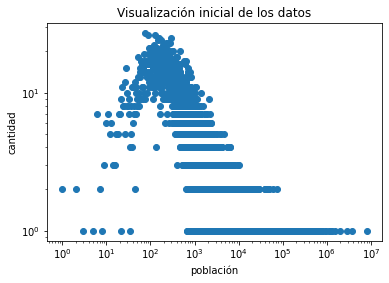

19447


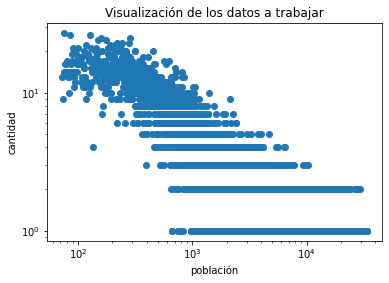

In [4]:
cities = open('cities.txt')

poblacion = []
for linea in cities:
  poblacion.append(int(linea))

c = Counter(poblacion)
sorted(c.items())
plt.plot(*zip(*sorted(c.items())), 'o')
plt.loglog()
plt.xlabel("población")
plt.ylabel("cantidad")
plt.title("Visualización inicial de los datos")
plt.show()

print(len(poblacion))
#Filtrado de valores pequeños con poca frecuencia
nuevaPoblacion = poblacion[600:18500]

c = Counter(nuevaPoblacion)
sorted(c.items())
plt.plot(*zip(*sorted(c.items())), 'o')
plt.loglog()
plt.xlabel("población")
plt.ylabel("cantidad")
plt.title("Visualización de los datos a trabajar")
plt.show()


-0.5254664097471633 2.126078192830937
Pediente para gráfico log/log: -0.5254664097471633


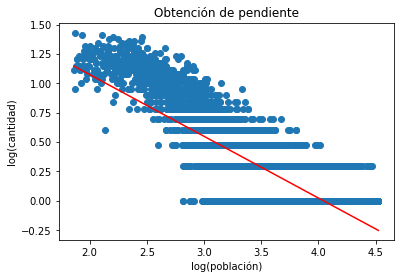

Pediente para gráfico con binning: -0.38713687414422154


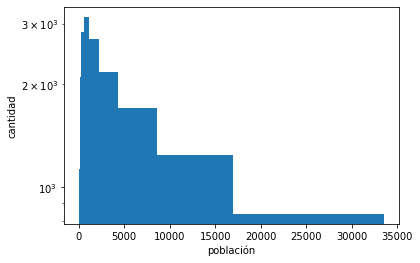

In [5]:

binsPob = 10
logbins = np.logspace(np.log10(nuevaPoblacion[0]), np.log10(nuevaPoblacion[-1]), binsPob)
dataSorted = sorted(c.items())

xPreg3 = []
yPreg3 = []
for i in range(len(dataSorted)):
  xPreg3.append(dataSorted[i][0])
  yPreg3.append(dataSorted[i][1])

mPreg3, bPreg3 = np.polyfit([np.log10(x) for x in xPreg3], [np.log10(x) for x in yPreg3], 1)
print(mPreg3, bPreg3)
plt.scatter([np.log10(x) for x in xPreg3], [np.log10(x) for x in yPreg3])
plt.plot([np.log10(x) for x in xPreg3], mPreg3*np.array([np.log10(x) for x in xPreg3]) + bPreg3, color="red")
#plt.plot([np.log10(x) for x in xPreg3], -0.387*np.array([np.log10(x) for x in xPreg3]) + 4.67, color="orange")
plt.xlabel("log(población)")
plt.ylabel("log(cantidad)")
plt.title("Obtención de pendiente")
print("Pediente para gráfico log/log: " + str(mPreg3))

plt.show()
count, bins, bars = plt.hist(nuevaPoblacion, bins=logbins, log = True)
plt.xlabel("población")
plt.ylabel("cantidad")
# Se eliminan las barras menores al valor máximo
count = count[3:]
bins = bins[3:]
# Se obtiene el valor central de cada barra
xEst2 = []
for i in range(len(count)):
  xEst2.append((bins[i] + bins[i+1])/2)

mPreg3e2, bPreg3e2 = np.polyfit([np.log10(x) for x in xEst2], [np.log10(x) for x in count], 1)
print("Pediente para gráfico con binning: " + str(mPreg3e2))
plt.show()


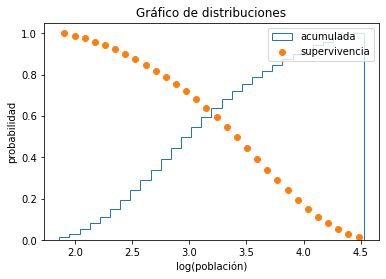

Pediente para gráfico de dist. de supervivencia : -0.4284504450097703


In [6]:
n , bins, patches = plt.hist([np.log10(x) for x in nuevaPoblacion], 30,density=True, histtype='step', cumulative=True, label='acumulada')
#La distribución de supervivencia es 1 - la acumulada
centeredBins = []
for i in range(len(n)):
  centeredBins.append((bins[i] + bins[i+1])/2)
plt.scatter(centeredBins[:], n[::-1], label = "supervivencia")
plt.legend()
plt.title("Gráfico de distribuciones")
plt.xlabel("log(población)")
plt.ylabel("probabilidad")
plt.show()
mPreg3e3, bPreg3e3 = np.polyfit(centeredBins, n[::-1], 1)
print("Pediente para gráfico de dist. de supervivencia : " + str(mPreg3e3))

#Pregunta 4

* Probabilidad de que un grano se pierda es 2/1000

In [ ]:
# Seeds para probar
random.seed(2021)
np.random.seed(2021)
# grado promedio ER = np
# 2 = np => 2/1000 = p

ER = nx.gnp_random_graph(1000, 2/1000)
BA = nx.barabasi_albert_graph(1000, 1)
print(nx.info(ER))
print(nx.info(BA))

gradosER = [val for (node, val) in ER.degree()]
gradosBA = [val for (node, val) in BA.degree()]

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 1021
Average degree:   2.0420
Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 999
Average degree:   1.9980


In [ ]:
baldeER = []
baldeBA = []
for grado in gradosER:
  valor = random.randint(0, grado)
  baldeER.append(valor)

for grado in gradosBA:
  valor = random.randint(0, grado)
  baldeBA.append(valor)

In [ ]:
def checkRebalse(nodo, balde, grados):
  return balde[nodo] > grados[nodo]

def cascada(nodo, grafo, balde, grados):
  vecinos = [n for n in grafo.neighbors(nodo)]
  balde[nodo] -= len(vecinos)
  total = 0
  for vecino in vecinos:
    grano = random.choices([1,0], [900, 100])[0]
    balde[vecino] += grano
    if checkRebalse(vecino, balde, grados):
      total += 1
      total += cascada(vecino, grafo, balde, grados)
  return total
 

In [ ]:
totalAvalanchasER = []
for i in range(10000):
  nodoRandom = random.randint(0, len(gradosER) - 1)
  baldeER[nodoRandom] += 1
  if checkRebalse(nodoRandom, baldeER, gradosER):
    # Rebalse
    totalAvalanchasER.append(cascada(nodoRandom, ER, baldeER, gradosER) + 1)

totalAvalanchasBA = []
for i in range(10000):
  nodoRandom = random.randint(0, len(gradosBA) - 1)
  baldeBA[nodoRandom] += 1
  if checkRebalse(nodoRandom, baldeBA, gradosBA):
    # Rebalse
    totalAvalanchasBA.append(cascada(nodoRandom, BA, baldeBA, gradosBA) + 1)

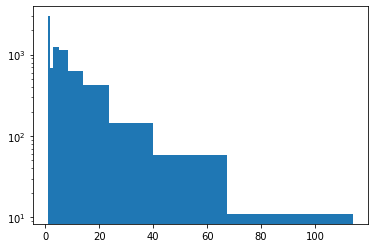

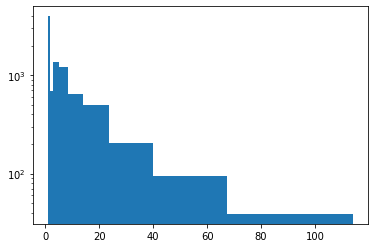

In [ ]:
logbins = np.logspace(np.log10(min(totalAvalanchasER)), np.log10(max(totalAvalanchasER)), 10)

plt.hist(totalAvalanchasER, bins=logbins, log = True)
plt.show()

plt.hist(totalAvalanchasBA, bins=logbins, log = True)
plt.show()

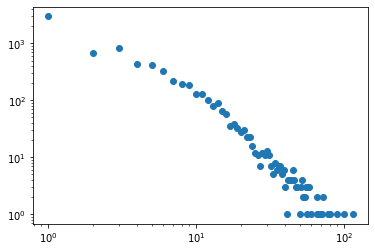

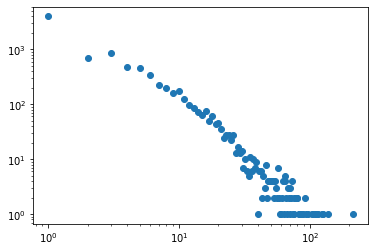

In [ ]:
c = Counter(totalAvalanchasER)
sorted(c.items())
plt.plot(*zip(*sorted(c.items())), 'o')
plt.loglog()
plt.show()

c = Counter(totalAvalanchasBA)
sorted(c.items())
plt.plot(*zip(*sorted(c.items())), 'o')
plt.loglog()
plt.show()

In [ ]:
paramMaxVer(0, totalAvalanchasER, "Avalanchas ER")
paramMaxVer(0, totalAvalanchasBA, "Avalanchas BA")

Valor de x_min para Avalanchas ER: 1
Valor de alpha para Avalanchas ER: 1.978583283295631
Valor de C para Avalanchas ER: 0.9785832832956309
Valor de x_min para Avalanchas BA: 1
Valor de alpha para Avalanchas BA: 2.0272440619791214
Valor de C para Avalanchas BA: 1.0272440619791214


# Pregunta 5

In [ ]:
def plotGraph(y): 
  # Basic stacked area chart.
  t = list(range(len(y[0])))
  plt.stackplot(t,y, labels=['Infectados','Recuperados', 'Vulnerables'])
  plt.legend(loc='upper left')
  plt.show()

def returnY(estadoNodosTiempo):
  y1, y2, y3 = ([], [], [])
  t = range(len(estadoNodosTiempo))
  for estado in estadoNodosTiempo:
    y1.append(estado.count(0))
    y2.append(estado.count(1))
    y3.append(estado.count(2))
  return [y2,y3,y1]

In [ ]:
# Seeds para probar
random.seed(2021)
np.random.seed(2021)
# grado promedio ER = np
# 2 = np => 2/1000 = p

ER = nx.gnp_random_graph(10000, 4/10000)
BA = nx.barabasi_albert_graph(10000, 2)
print(nx.info(ER))
print(nx.info(BA))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 20176
Average degree:   4.0352
Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 19996
Average degree:   3.9992


## Estrategia 0

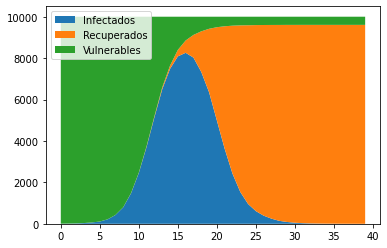

Tiempo de la epidemia:  44
Cantidad de infectados:  8716
Peak de infectados:  8257


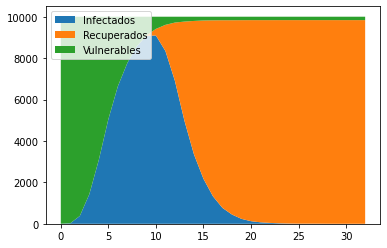

Tiempo de la epidemia:  42
Cantidad de infectados:  8938
Peak de infectados:  9093


In [ ]:
for simulacion in range(30):
  estadoNodos = [0] * 10000
  contadorInfectado = [0] * 10000
  estadoNodos[random.randint(0,9999)] = 1
  estadoNodosTiempo = []
  while estadoNodos.count(1) != 0:
    estadoNodosTemp = estadoNodos.copy()
    for i in range(10000):
      if contadorInfectado[i] == 8:
        estadoNodosTemp[i] = 2
      estado = estadoNodosTemp[i] # Se checkea el estado de ese nodo
      if estado == 1: # Esta contagiado
        contadorInfectado[i] += 1
        vecinos = [n for n in ER.neighbors(i)]
        for vecino in vecinos: # Se recorren los vecinos
          if estadoNodosTemp[vecino] == 0: # Si no esta infectado o inmune
            contagio = random.choices([1,0], [2,8])[0]
            if contagio:
              estadoNodosTemp[vecino] = 1 # Se contagia el vecino
      estadoNodos = estadoNodosTemp.copy()
    estadoNodosTiempo.append(estadoNodos)
  y = returnY(estadoNodosTiempo)
  listaTiempos.append(len(y[0]))
  listaInfectados.append(y[1][-1])

y = returnY(estadoNodosTiempo)
plotGraph(y)
print("Tiempo de la epidemia: ", round(np.mean(listaTiempos)))
print("Cantidad de infectados: ", round(np.mean(listaInfectados)))
print("Peak de infectados: ", max(y[0]))


# BA
for simulacion in range(30):
  estadoNodos = [0] * 10000
  contadorInfectado = [0] * 10000
  estadoNodos[random.randint(0,9999)] = 1
  estadoNodosTiempo = []
  while estadoNodos.count(1) != 0:
    estadoNodosTemp = estadoNodos.copy()
    for i in range(10000):
      if contadorInfectado[i] == 8:
        estadoNodosTemp[i] = 2
      estado = estadoNodosTemp[i] # Se checkea el estado de ese nodo
      if estado == 1: # Esta contagiado
        contadorInfectado[i] += 1
        vecinos = [n for n in BA.neighbors(i)]
        for vecino in vecinos: # Se recorren los vecinos
          if estadoNodosTemp[vecino] == 0: # Si no esta infectado o inmune
            contagio = random.choices([1,0], [2,8])[0]
            if contagio:
              estadoNodosTemp[vecino] = 1 # Se contagia el vecino
      estadoNodos = estadoNodosTemp.copy()
    estadoNodosTiempo.append(estadoNodos)
  y = returnY(estadoNodosTiempo)
  listaTiempos.append(len(y[0]))
  listaInfectados.append(y[1][-1])

y = returnY(estadoNodosTiempo)
plotGraph(y)
print("Tiempo de la epidemia: ", round(np.mean(listaTiempos)))
print("Cantidad de infectados: ", round(np.mean(listaInfectados)))
print("Peak de infectados: ", max(y[0]))

## Estrategia 1

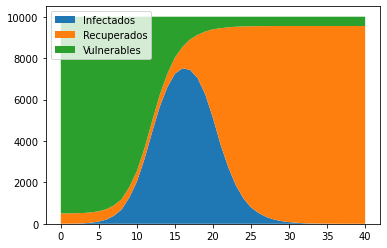

Tiempo de la epidemia:  44
Cantidad de infectados:  9047
Peak de infectados:  7510


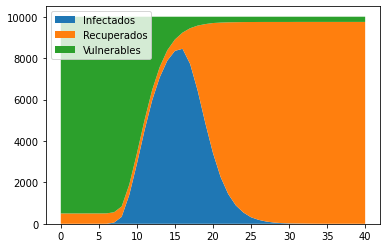

Tiempo de la epidemia:  36
Cantidad de infectados:  9249
Peak de infectados:  8451


In [ ]:
listaTiempos = []
listaInfectados = []

for simulacion in range(30):
  estadoNodos = [0] * 10000
  contadorInfectado = [0] * 10000
  estadoNodosTiempo = []

  nodosAVacunar = random.sample(list(range(10000)), 500)
  for nodo in nodosAVacunar:
    estadoNodos[nodo] = 2

  nodoInfectado = random.randint(0,9999)
  while estadoNodos[nodoInfectado] != 2:
    nodoInfectado = random.randint(0,9999)

  estadoNodos[nodoInfectado] = 1

  while estadoNodos.count(1) != 0:
    estadoNodosTemp = estadoNodos.copy()
    for i in range(10000):
      if contadorInfectado[i] == 8:
        estadoNodosTemp[i] = 2
      estado = estadoNodosTemp[i] # Se checkea el estado de ese nodo
      if estado == 1: # Esta contagiado
        contadorInfectado[i] += 1
        vecinos = [n for n in ER.neighbors(i)]
        for vecino in vecinos: # Se recorren los vecinos
          if estadoNodosTemp[vecino] == 0: # Si no esta infectado o inmune
            contagio = random.choices([1,0], [2,8])[0]
            if contagio:
              estadoNodosTemp[vecino] = 1 # Se contagia el vecino
      estadoNodos = estadoNodosTemp.copy()
    estadoNodosTiempo.append(estadoNodos)
  y = returnY(estadoNodosTiempo)
  listaTiempos.append(len(y[0]))
  listaInfectados.append(y[1][-1]-500)

y = returnY(estadoNodosTiempo)
plotGraph(y)
print("Tiempo de la epidemia: ", round(np.mean(listaTiempos)))
print("Cantidad de infectados: ", round(np.mean(listaInfectados)))
print("Peak de infectados: ", max(y[0]))

# BA
listaTiempos = []
listaInfectados = []

for simulacion in range(30):
  estadoNodos = [0] * 10000
  contadorInfectado = [0] * 10000
  estadoNodosTiempo = []

  nodosAVacunar = random.sample(list(range(10000)), 500)
  for nodo in nodosAVacunar:
    estadoNodos[nodo] = 2

  nodoInfectado = random.randint(0,9999)
  while estadoNodos[nodoInfectado] != 2:
    nodoInfectado = random.randint(0,9999)

  estadoNodos[nodoInfectado] = 1

  while estadoNodos.count(1) != 0:
    estadoNodosTemp = estadoNodos.copy()
    for i in range(10000):
      if contadorInfectado[i] == 8:
        estadoNodosTemp[i] = 2
      estado = estadoNodosTemp[i] # Se checkea el estado de ese nodo
      if estado == 1: # Esta contagiado
        contadorInfectado[i] += 1
        vecinos = [n for n in BA.neighbors(i)]
        for vecino in vecinos: # Se recorren los vecinos
          if estadoNodosTemp[vecino] == 0: # Si no esta infectado o inmune
            contagio = random.choices([1,0], [2,8])[0]
            if contagio:
              estadoNodosTemp[vecino] = 1 # Se contagia el vecino
      estadoNodos = estadoNodosTemp.copy()
    estadoNodosTiempo.append(estadoNodos)
  y = returnY(estadoNodosTiempo)
  listaTiempos.append(len(y[0]))
  listaInfectados.append(y[1][-1]-500)

y = returnY(estadoNodosTiempo)
plotGraph(y)
print("Tiempo de la epidemia: ", round(np.mean(listaTiempos)))
print("Cantidad de infectados: ", round(np.mean(listaInfectados)))
print("Peak de infectados: ", max(y[0]))

## Estrategia 2

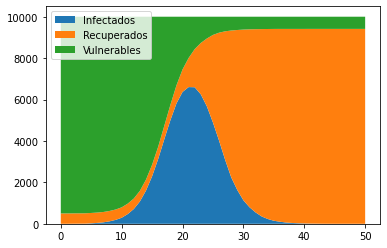

Tiempo de la epidemia:  40
Cantidad de infectados:  8630
Peak de infectados:  6602


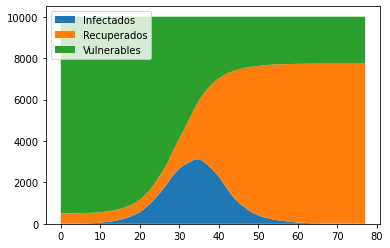

Tiempo de la epidemia:  47
Cantidad de infectados:  7442
Peak de infectados:  3120


In [ ]:
for simulacion in range(30):
  estadoNodos = [0] * 10000
  contadorInfectado = [0] * 10000
  estadoNodosTiempo = []

  listaAVacunar = sorted(ER.degree, key=lambda x: x[1], reverse=True)[:500]
  for nodo, grado in listaAVacunar:
    estadoNodos[nodo] = 2

  while True:
    nodoInfectado = random.randint(0,9999)
    if estadoNodos[nodoInfectado] != 2:
      break
  estadoNodos[nodoInfectado] = 1


  while estadoNodos.count(1) != 0:
    estadoNodosTemp = estadoNodos.copy()
    for i in range(10000):
      if contadorInfectado[i] == 8:
        estadoNodosTemp[i] = 2
      estado = estadoNodosTemp[i] # Se checkea el estado de ese nodo
      if estado == 1: # Esta contagiado
        contadorInfectado[i] += 1
        vecinos = [n for n in ER.neighbors(i)]
        for vecino in vecinos: # Se recorren los vecinos
          if estadoNodosTemp[vecino] == 0: # Si no esta infectado o inmune
            contagio = random.choices([1,0], [2,8])[0]
            if contagio:
              estadoNodosTemp[vecino] = 1 # Se contagia el vecino
      estadoNodos = estadoNodosTemp.copy()
    estadoNodosTiempo.append(estadoNodos)
  y = returnY(estadoNodosTiempo)
  listaTiempos.append(len(y[0]))
  listaInfectados.append(y[1][-1]-500)

y = returnY(estadoNodosTiempo)
plotGraph(y)
print("Tiempo de la epidemia: ", round(np.mean(listaTiempos)))
print("Cantidad de infectados: ", round(np.mean(listaInfectados)))
print("Peak de infectados: ", max(y[0]))

# BA
for simulacion in range(30):
  estadoNodos = [0] * 10000
  contadorInfectado = [0] * 10000
  estadoNodosTiempo = []

  listaAVacunar = sorted(BA.degree, key=lambda x: x[1], reverse=True)[:500]
  for nodo, grado in listaAVacunar:
    estadoNodos[nodo] = 2

  while True:
    nodoInfectado = random.randint(0,9999)
    if estadoNodos[nodoInfectado] != 2:
      break
  estadoNodos[nodoInfectado] = 1


  while estadoNodos.count(1) != 0:
    estadoNodosTemp = estadoNodos.copy()
    for i in range(10000):
      if contadorInfectado[i] == 8:
        estadoNodosTemp[i] = 2
      estado = estadoNodosTemp[i] # Se checkea el estado de ese nodo
      if estado == 1: # Esta contagiado
        contadorInfectado[i] += 1
        vecinos = [n for n in BA.neighbors(i)]
        for vecino in vecinos: # Se recorren los vecinos
          if estadoNodosTemp[vecino] == 0: # Si no esta infectado o inmune
            contagio = random.choices([1,0], [2,8])[0]
            if contagio:
              estadoNodosTemp[vecino] = 1 # Se contagia el vecino
      estadoNodos = estadoNodosTemp.copy()
    estadoNodosTiempo.append(estadoNodos)
  y = returnY(estadoNodosTiempo)
  listaTiempos.append(len(y[0]))
  listaInfectados.append(y[1][-1]-500)

y = returnY(estadoNodosTiempo)
plotGraph(y)
print("Tiempo de la epidemia: ", round(np.mean(listaTiempos)))
print("Cantidad de infectados: ", round(np.mean(listaInfectados)))
print("Peak de infectados: ", max(y[0]))



## Estrategia 3

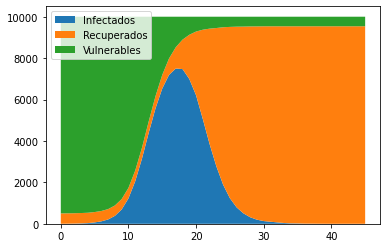

Tiempo de la epidemia:  45
Cantidad de infectados:  8087
Peak de infectados:  7499


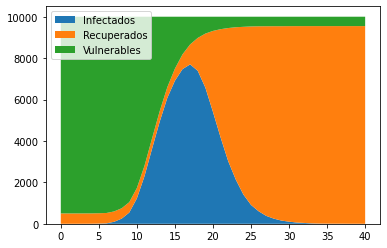

Tiempo de la epidemia:  45
Cantidad de infectados:  8218
Peak de infectados:  7698


In [ ]:
for simulacion in range(30):
  estadoNodosTiempo = []
  estadoNodos = [0] * 10000
  contadorInfectado = [0] * 10000
  cantidadVacunas = 500
  while True:
    nodo = random.randint(0, 9999)
    if estadoNodos[nodo] != 2:
      if cantidadVacunas == 0:
        break
      estadoNodos[nodo] = 2
      cantidadVacunas -= 1
      vecinos = [n for n in ER.neighbors(nodo)]
      for vecino in vecinos:
        if cantidadVacunas == 0:
          break
        if estadoNodos[vecino] != 2:
          estadoNodos[vecino] = 2
          cantidadVacunas -= 1

  while True:
    nodoInfectado = random.randint(0,9999)
    if estadoNodos[nodoInfectado] != 2:
      break
  estadoNodos[nodoInfectado] = 1


  while estadoNodos.count(1) != 0:
    estadoNodosTemp = estadoNodos.copy()
    for i in range(10000):
      if contadorInfectado[i] == 8:
        estadoNodosTemp[i] = 2
      estado = estadoNodosTemp[i] # Se checkea el estado de ese nodo
      if estado == 1: # Esta contagiado
        contadorInfectado[i] += 1
        vecinos = [n for n in ER.neighbors(i)]
        for vecino in vecinos: # Se recorren los vecinos
          if estadoNodosTemp[vecino] == 0: # Si no esta infectado o inmune
            contagio = random.choices([1,0], [2,8])[0]
            if contagio:
              estadoNodosTemp[vecino] = 1 # Se contagia el vecino
      estadoNodos = estadoNodosTemp.copy()
    estadoNodosTiempo.append(estadoNodos)
  y = returnY(estadoNodosTiempo)
  listaTiempos.append(len(y[0]))
  listaInfectados.append(y[1][-1]-500)

y = returnY(estadoNodosTiempo)
plotGraph(y)
print("Tiempo de la epidemia: ", round(np.mean(listaTiempos)))
print("Cantidad de infectados: ", round(np.mean(listaInfectados)))
print("Peak de infectados: ", max(y[0]))

# BA
for simulacion in range(30):
  estadoNodosTiempo = []
  estadoNodos = [0] * 10000
  contadorInfectado = [0] * 10000
  cantidadVacunas = 500
  while True:
    nodo = random.randint(0, 9999)
    if estadoNodos[nodo] != 2:
      if cantidadVacunas == 0:
        break
      estadoNodos[nodo] = 2
      cantidadVacunas -= 1
      vecinos = [n for n in BA.neighbors(nodo)]
      for vecino in vecinos:
        if cantidadVacunas == 0:
          break
        if estadoNodos[vecino] != 2:
          estadoNodos[vecino] = 2
          cantidadVacunas -= 1

  while True:
    nodoInfectado = random.randint(0,9999)
    if estadoNodos[nodoInfectado] != 2:
      break
  estadoNodos[nodoInfectado] = 1


  while estadoNodos.count(1) != 0:
    estadoNodosTemp = estadoNodos.copy()
    for i in range(10000):
      if contadorInfectado[i] == 8:
        estadoNodosTemp[i] = 2
      estado = estadoNodosTemp[i] # Se checkea el estado de ese nodo
      if estado == 1: # Esta contagiado
        contadorInfectado[i] += 1
        vecinos = [n for n in BA.neighbors(i)]
        for vecino in vecinos: # Se recorren los vecinos
          if estadoNodosTemp[vecino] == 0: # Si no esta infectado o inmune
            contagio = random.choices([1,0], [2,8])[0]
            if contagio:
              estadoNodosTemp[vecino] = 1 # Se contagia el vecino
      estadoNodos = estadoNodosTemp.copy()
    estadoNodosTiempo.append(estadoNodos)
  y = returnY(estadoNodosTiempo)
  listaTiempos.append(len(y[0]))
  listaInfectados.append(y[1][-1]-500)

y = returnY(estadoNodosTiempo)
plotGraph(y)
print("Tiempo de la epidemia: ", round(np.mean(listaTiempos)))
print("Cantidad de infectados: ", round(np.mean(listaInfectados)))
print("Peak de infectados: ", max(y[0]))